In [1]:
%load_ext autoreload
%autoreload 2

# Trabajo Práctico 4: Aprendizaje No-Supervisado

### 1. Clustering de datos. Para el dataset clustering.csv realizar los siguientes análisis:

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.algorithms import kmeans, gmm, dbscan, pca

df = pd.read_csv('data/clustering.csv')
X = df[['A', 'B']].values



Implementar el algoritmo K-means y determinar la cantidad de clusters con el método de “ganancias decrecientes” (graficar L vs. K, y elegir un valor K donde al aumentar K deje de reducir significativamente L, donde L es la suma de las distancias). Graficar el conjunto de datos xi mostrando a qué cluster pertenece cada dato (usando colores/marcadores distintos para cada cluster) y también mostrar el centroide de cada cluster.

Primero graficamos L vs K

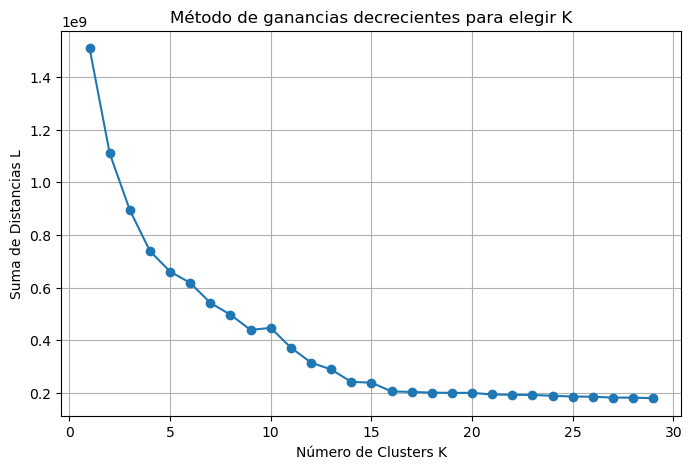

In [31]:
Ks = range(1, 30)
Ls = []

for k in Ks:
    _, _, L = kmeans(X, k)
    Ls.append(L)

# Graficar L vs. K
plt.figure(figsize=(8, 5))
plt.plot(Ks, Ls, marker='o')
plt.xlabel('Número de Clusters K')
plt.ylabel('Suma de Distancias L')
plt.title('Método de ganancias decrecientes para elegir K')
plt.grid(True)
plt.show()

Mirando el grafico elegimos K = 9 y graficamos clusters

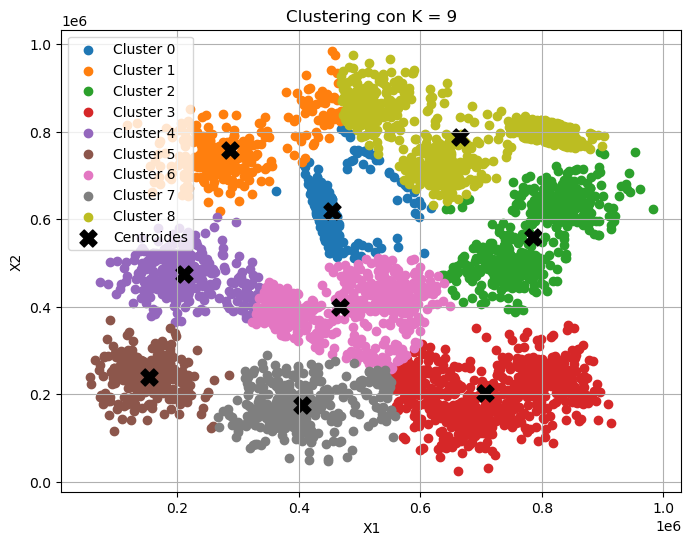

In [53]:
K_optimo = 9
labels, centroids, _ = kmeans(X, K_optimo)

# Graficar clusters y centroides
plt.figure(figsize=(8, 6))
for k in range(K_optimo):
    cluster_points = X[labels == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=150, marker='X', label='Centroides')
plt.title(f'Clustering con K = {K_optimo}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

Implementar el algoritmo Gaussian Mixture Model (GMM) y realizar la misma tarea que en el inciso anterior. Recuerde que puede inicializar la optimización de GMM con una corrida de K-means.

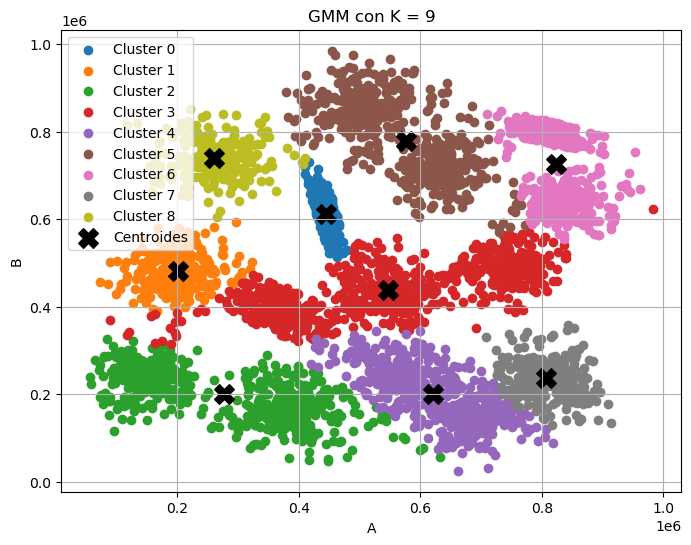

In [55]:
K_opt = 9
labels, means, _ = gmm(X, K_opt)

plt.figure(figsize=(8, 6))
for i in range(K_opt):
    points = X[labels == i]
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {i}")
plt.scatter(means[:, 0], means[:, 1], color='black', marker='X', s=200, label='Centroides')
plt.title(f"GMM con K = {K_opt}")
plt.xlabel("A")
plt.ylabel("B")
plt.legend()
plt.grid(True)
plt.show()


Implementar el algoritmo DBSCAN y aplicarlo al conjunto de datos. Explorar el efecto de variar los parámetros ε (radio de la vecindad) y K (mínimo número de puntos en una zona densa). Luego, elegir una combinación razonable de ε y K y graficar los datos
mostrando a qué cluster pertenece cada uno, utilizando colores/marcadores distintos para cada cluster/ruido.

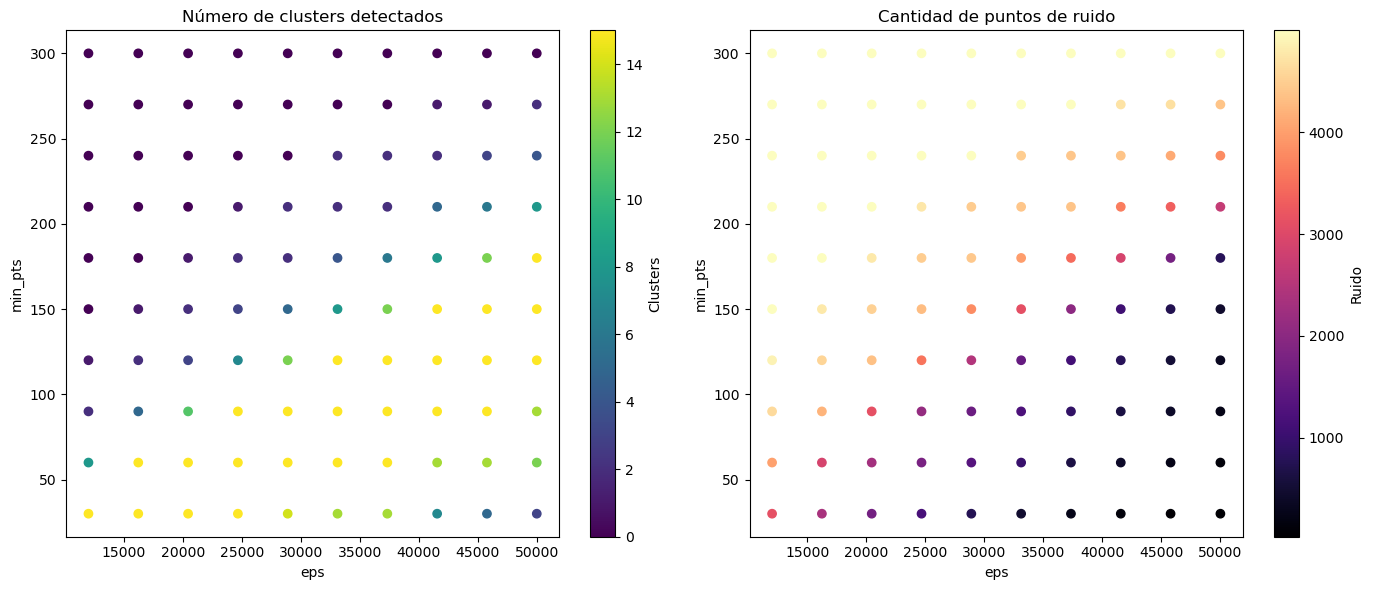

In [82]:
eps_l = np.linspace(12000, 50000, 10)
min_pts_l = np.linspace(30,300, 10)

results = []
for eps in eps_l:
    for min_pts in min_pts_l:
        labels = dbscan(X, eps=eps, min_pts=min_pts)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = np.sum(labels == -1)
        results.append((eps, min_pts, n_clusters, n_noise))

results = np.array(results)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de número de clusters
sc1 = ax[0].scatter(results[:, 0], results[:, 1], c=results[:, 2], cmap='viridis')
ax[0].set_xlabel('eps')
ax[0].set_ylabel('min_pts')
ax[0].set_title('Número de clusters detectados')
fig.colorbar(sc1, ax=ax[0], label='Clusters')

# Gráfico de cantidad de ruido
sc2 = ax[1].scatter(results[:, 0], results[:, 1], c=results[:, 3], cmap='magma')
ax[1].set_xlabel('eps')
ax[1].set_ylabel('min_pts')
ax[1].set_title('Cantidad de puntos de ruido')
fig.colorbar(sc2, ax=ax[1], label='Ruido')

plt.tight_layout()
plt.show()

vemos que con bajo ε y alto K, hay muy pocos clusters. tambien vemos que con mucho K, tiene mucho ruido, aunque cuanto mas ε menos ruido.

C:\Users\Matteo\AppData\Local\Temp\ipykernel_31308\1008114100.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", max(10, n_clusters + 1))


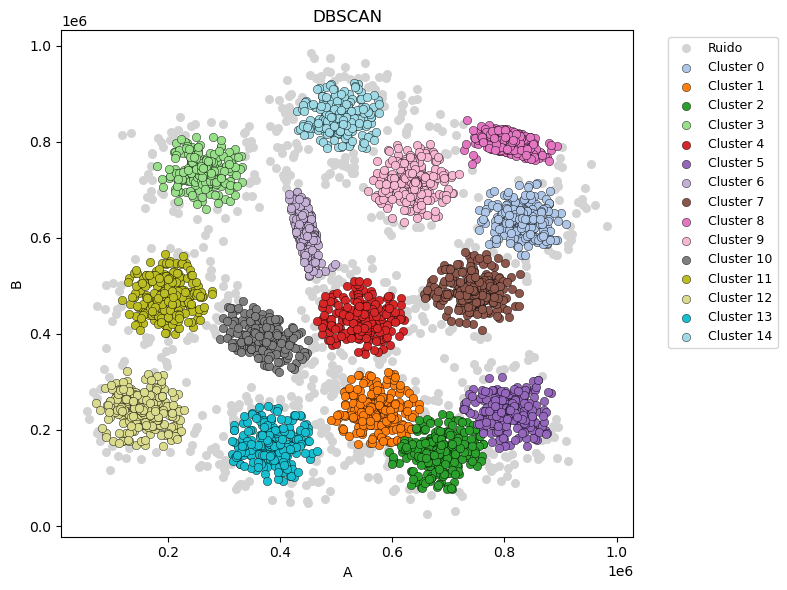

In [ ]:
def plot_dbscan(X, labels):
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    colors = plt.colormaps.get_cmap("tab20", n_clusters + 1)

    plt.figure(figsize=(8, 6))

    for i, label in enumerate(unique_labels):
        mask = labels == label
        if label == -1:
            # Ruido: color gris claro, transparente
            plt.scatter(
                X[mask, 0], X[mask, 1],
                c='lightgray',
                alpha=1,
                s=30,
                label="Ruido"
            )
        else:
            plt.scatter(
                X[mask, 0], X[mask, 1],
                color=colors(i % 20),
                label=f"Cluster {label}",
                edgecolor='k',
                linewidth=0.3
            )

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    plt.title("DBSCAN")
    plt.xlabel("A")
    plt.ylabel("B")
    plt.tight_layout()
    plt.show()

# Ejemplo de uso con parámetros elegidos
labels = dbscan(X, eps=45000, min_pts=125)
plot_dbscan(X, labels)


Reducción de dimensionalidad. Este problema se basará en el dataset MNIST_dataset.csv, que contiene representaciones tabulares de imágenes de dígitos del 0 al 9. Originalmente, cada imagen tiene una resolución de 28x28 píxeles en escala de grises. En este conjunto de datos, cada imagen se representa como una fila de 784 (28x28) valores, donde cada valor representa la intensidad de gris de un píxel en la imagen.

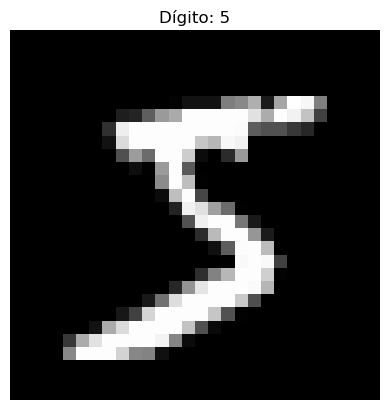

In [98]:
df = pd.read_csv("data/MNIST_dataset.csv")
X = df.drop(columns=["label"]).values
y = df["label"].values

# Mostrar una imagen
idx = 0
plt.imshow(X[idx].reshape(28, 28), cmap="gray")
plt.title(f"Dígito: {y[idx]}")
plt.axis("off")
plt.show()

Implementar Principal Component Analysis (PCA) y aplicarlo al conjunto de datos. Graficar cómo varía el error cuadrático medio de reconstrucción sobre el conjunto de datos en función de la cantidad de componentes principales utilizadas.

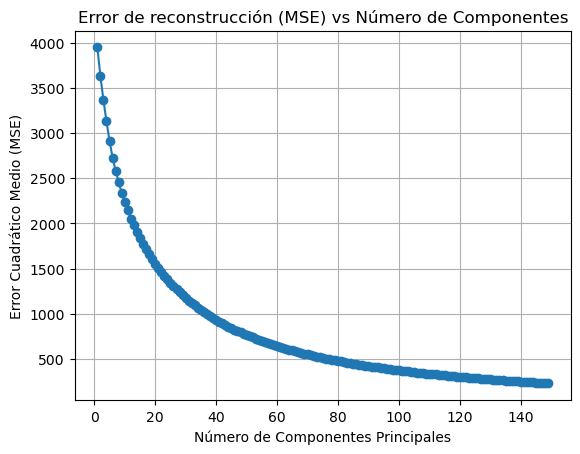

In [ ]:
mse_list = []
components_list = list(range(1, 150))   

for k in components_list:
    _, X_rec = pca(X, n_components=k)
    mse = np.mean((X - X_rec) ** 2)
    mse_list.append(mse)

# Plot
import matplotlib.pyplot as plt

plt.plot(components_list, mse_list, marker='o')
plt.title("Error de reconstrucción (MSE) vs Número de Componentes")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.grid(True)
plt.show()


Buscamos el punto codo y mas o menos en 40 parece bien.

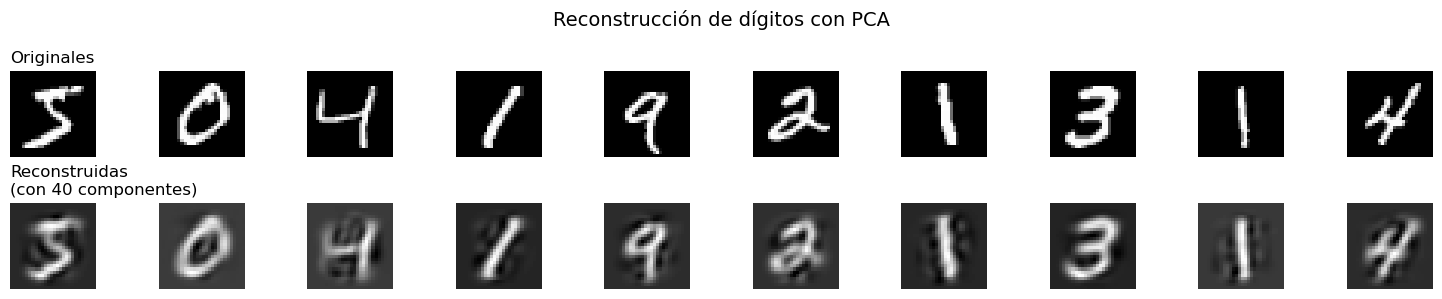

In [ ]:
n_components = 40
X_reduced, X_reconstructed = pca(X, n_components=n_components)

fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    # Imagen original
    axes[0, i].imshow(X[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    # Imagen reconstruida
    axes[1, i].imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("Originales", fontsize=12, loc='left')
axes[1, 0].set_title(f"Reconstruidas\n(con {n_components} componentes)", fontsize=12, loc='left')
plt.suptitle("Reconstrucción de dígitos con PCA", fontsize=14)
plt.tight_layout()
plt.show()


In [113]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from src.pytorch import VAE, loss_function

# Convertir a tensores
X_tensor = torch.tensor(X, dtype=torch.float32)

# Normalizar entre 0 y 1 (ya debería estar si viene de píxeles, pero por las dudas)
X_tensor /= 255.0

# Crear dataset y dividir
dataset = TensorDataset(X_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

# Dataloaders
batch_size = 128
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size)


Entrenar un modelo de autoencoder variacional (VAE) utilizando la librería PyTorch para armar y entrenar las redes neuronales involucradas (la red de encoder y la de decoder). Recuerde dividir el conjunto de datos en dos subconjuntos: entrenamiento y validación. El subconjunto de entrenamiento se empleará para entrenar el VAE, mientras que el de validación servirá para ajustar los hiperparámetros y evaluar el error de reconstrucción. Una vez desarrollado el VAE, compare la calidad de las imágenes reconstruidas con las obtenidas mediante PCA en el inciso anterior, utilizando 10 imagenes tomadas aleatoriamente del conjunto de validación del VAE.

In [114]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = VAE(latent_dim=20).to(device)
optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)

# Entrenamiento
epochs = 20
vae.train()
for epoch in range(epochs):
    train_loss = 0
    for (x_batch,) in train_loader:
        x_batch = x_batch.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(x_batch)
        loss = loss_function(recon_batch, x_batch, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {train_loss / len(train_loader.dataset):.2f}")


Epoch 1, Loss: 46.07
Epoch 2, Loss: 35.18
Epoch 3, Loss: 33.25
Epoch 4, Loss: 32.30
Epoch 5, Loss: 31.79
Epoch 6, Loss: 31.41
Epoch 7, Loss: 31.18
Epoch 8, Loss: 30.95
Epoch 9, Loss: 30.77
Epoch 10, Loss: 30.65
Epoch 11, Loss: 30.51
Epoch 12, Loss: 30.42
Epoch 13, Loss: 30.34
Epoch 14, Loss: 30.23
Epoch 15, Loss: 30.16
Epoch 16, Loss: 30.10
Epoch 17, Loss: 30.04
Epoch 18, Loss: 29.96
Epoch 19, Loss: 29.90
Epoch 20, Loss: 29.82


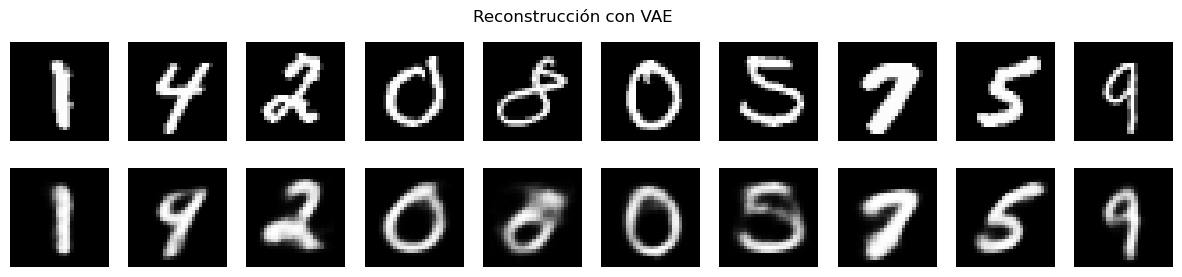

In [115]:
vae.eval()
with torch.no_grad():
    x_val = next(iter(val_loader))[0].to(device)[:10]  # 10 imágenes
    recon_val, _, _ = vae(x_val)

# Visualizar originales vs reconstruidas
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    axes[0, i].imshow(x_val[i].cpu().numpy().reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(recon_val[i].cpu().numpy().reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
axes[0, 0].set_ylabel("Originales")
axes[1, 0].set_ylabel("Reconstruidas")
plt.suptitle("Reconstrucción con VAE")
plt.show()
